In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import importlib
import network_generation as homomul
homomul_viz = importlib.import_module("homophily_multi_attr_viz")

## Model inputs

### Number of nodes

In [3]:
N = 1000

### Average degree = 2m

In [4]:
m = 10

### Population distribution

In [5]:
## Population fractions

correl_param = 0 ## Between 0 and 1
pop_fracs_lst = [[0.1,0.9],[0.5,0.5]] ## Marginal population distributions

## Joint population distribution. It's a tensor T where each element T[i1,i2,i3,...,iD] corresponds to the population fraction
## of the group (i1,i2,i3,...,iD). D is the total number of dimensions.
comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst, correl_param) 
pprint(comp_pop_frac_tnsr)

array([[0. , 0.1],
       [0.5, 0.4]])


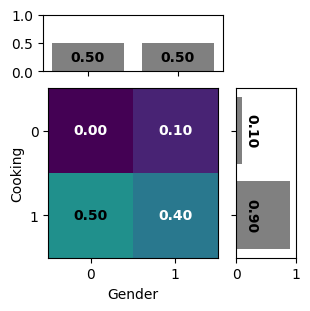

In [6]:
## Plot population distribution
homomul_viz.fig_2bin_comp_pop_frac(comp_pop_frac_tnsr)
plt.ylabel("Cooking")
plt.xlabel("Gender")
plt.show()

### Interaction preferences

#### One-dimensional homophily / heterophily matrices

In [7]:
## One-dimensional matrices of connection preference
h=0.9
h1 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h2 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h_mtrx_lst = np.array([h1,h2])

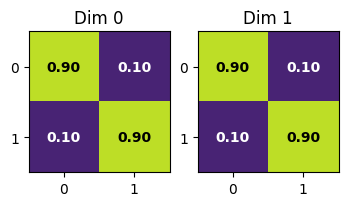

In [8]:
## Plot homophily / heterophily 1D matrices
plt.figure(figsize=(4,2))
ax = plt.subplot(1,2,1)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[0],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 0")
ax = plt.subplot(1,2,2)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[1],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 1")
plt.show()

#### Aggregation type

In [9]:
homophily_kind = "all"
## all -> Attempt connection in every dimension. All attempts must be successful.
## any -> Attempt connection in every dimension. At least one attempt must be successful.
## one -> Attempt connection in one random dimension. The probability of choosing each dimension is given by inpyt array p_d
## max -> Attempt connection in dimension with highest homophily with probability alpha. With probability 1-alpha, random dimension.
## min -> Attempt connection in dimension with lowest homophily with probability alpha. With probability 1-alpha, random dimension.

## Generate network

### Erdos-Renyi style

In [10]:
G_ER = homomul.am_v2(
            h_mtrx_lst,
            comp_pop_frac_tnsr,
            homophily_kind=homophily_kind,
            directed=False,
            pop_fracs_lst = pop_fracs_lst,
            N=N,
            m=m,
            v = 1, ## Verbosity
            )

0
0
0
0
1000
1000
1000
2000
2000
3000
3000
4000
4000
4000
5000
5000
5000
6000
6000
6000
7000
8000
9000


In [11]:
np.mean(list(dict(G_ER.degree()).values()))

20.0

In [12]:
pprint(dict(G_ER.nodes(data=True)))

{0: {'attr': (1, 0)},
 1: {'attr': (0, 1)},
 2: {'attr': (1, 1)},
 3: {'attr': (0, 1)},
 4: {'attr': (1, 0)},
 5: {'attr': (0, 1)},
 6: {'attr': (1, 1)},
 7: {'attr': (1, 1)},
 8: {'attr': (1, 0)},
 9: {'attr': (1, 1)},
 10: {'attr': (0, 1)},
 11: {'attr': (1, 0)},
 12: {'attr': (1, 1)},
 13: {'attr': (1, 0)},
 14: {'attr': (1, 0)},
 15: {'attr': (1, 1)},
 16: {'attr': (0, 1)},
 17: {'attr': (1, 0)},
 18: {'attr': (1, 0)},
 19: {'attr': (1, 1)},
 20: {'attr': (1, 1)},
 21: {'attr': (1, 0)},
 22: {'attr': (1, 0)},
 23: {'attr': (1, 0)},
 24: {'attr': (1, 1)},
 25: {'attr': (1, 0)},
 26: {'attr': (1, 1)},
 27: {'attr': (1, 0)},
 28: {'attr': (1, 0)},
 29: {'attr': (1, 0)},
 30: {'attr': (1, 1)},
 31: {'attr': (1, 0)},
 32: {'attr': (1, 0)},
 33: {'attr': (1, 0)},
 34: {'attr': (1, 0)},
 35: {'attr': (1, 1)},
 36: {'attr': (1, 0)},
 37: {'attr': (1, 1)},
 38: {'attr': (1, 0)},
 39: {'attr': (0, 1)},
 40: {'attr': (1, 0)},
 41: {'attr': (1, 0)},
 42: {'attr': (1, 0)},
 43: {'attr': (0, 1)}

In [13]:
pprint(list(G_ER.edges()))

[(0, 320),
 (0, 840),
 (0, 28),
 (0, 656),
 (0, 181),
 (0, 275),
 (0, 817),
 (0, 140),
 (0, 783),
 (0, 40),
 (0, 958),
 (0, 11),
 (0, 431),
 (0, 368),
 (0, 62),
 (0, 826),
 (0, 394),
 (0, 747),
 (0, 382),
 (1, 120),
 (1, 279),
 (1, 603),
 (1, 683),
 (1, 771),
 (1, 587),
 (2, 703),
 (2, 232),
 (2, 663),
 (2, 916),
 (2, 443),
 (2, 287),
 (2, 906),
 (2, 198),
 (2, 774),
 (2, 771),
 (2, 372),
 (2, 575),
 (2, 971),
 (2, 213),
 (2, 616),
 (2, 936),
 (2, 326),
 (3, 670),
 (3, 982),
 (3, 361),
 (3, 411),
 (3, 311),
 (3, 994),
 (4, 954),
 (4, 114),
 (4, 975),
 (4, 612),
 (4, 867),
 (4, 337),
 (4, 233),
 (4, 315),
 (4, 61),
 (4, 745),
 (4, 763),
 (4, 586),
 (4, 418),
 (4, 506),
 (4, 627),
 (4, 410),
 (4, 541),
 (4, 947),
 (4, 384),
 (4, 654),
 (4, 491),
 (5, 838),
 (5, 193),
 (5, 963),
 (5, 894),
 (5, 805),
 (5, 500),
 (5, 683),
 (5, 994),
 (6, 847),
 (6, 659),
 (6, 462),
 (6, 401),
 (6, 60),
 (6, 53),
 (6, 660),
 (6, 72),
 (6, 600),
 (6, 149),
 (6, 626),
 (6, 973),
 (6, 276),
 (6, 913),
 (6, 47

In [14]:
## Export the network in gexf format to visualize it with gephi: https://gephi.org/
G_out = homomul.G_attr_to_str(G_ER,"attr") ## Change tuple to string so that gephi can read the file
nx.write_gexf(G_out, "partial_results/tests/ER_nw.gexf")